In [1]:
#Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
#data collection and analysis

In [6]:
#loading the dataset fron csv file to a pandas dataframe

In [8]:
big_mart=pd.read_csv('C:/Users/aditya/Desktop/Train.csv')

In [ ]:
#first five rows of the data frame

In [9]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#number of datapoint and number of features

In [11]:
big_mart.shape

(8523, 12)

In [12]:
#getting some information about the dataset

In [13]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
#checking the missing values

In [16]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#handling the missing values

In [26]:
#filling the missing values in "item weight" with "mean" value

In [27]:
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace=True)

In [28]:
#replacing the missing values in "outlate size" with mode

In [29]:
big_mart['Outlet_Size'].mode()

0    Small
dtype: object

In [30]:
mode_of_Outlet_size = big_mart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [32]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [33]:
miss_values = big_mart['Outlet_Size'].isnull()   

In [34]:
print(miss_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [35]:
big_mart.loc[miss_values, 'Outlet_Size'] = big_mart.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [36]:
big_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [39]:
#Item weight distribution

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


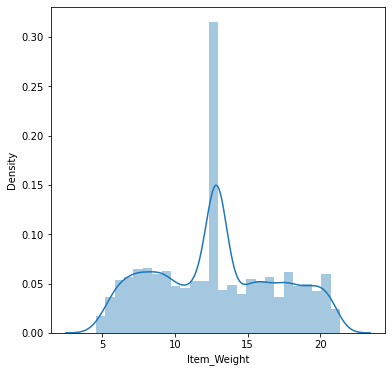

In [42]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Weight'])
plt.show()

In [ ]:
#Item_Visibility distribution

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


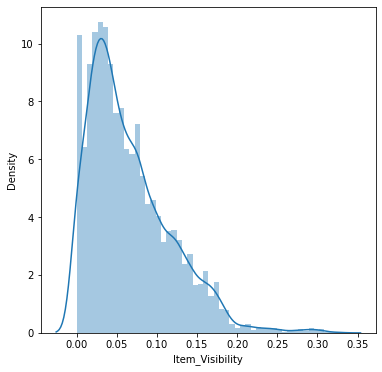

In [43]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Visibility'])
plt.show()

In [ ]:
#Item_MRP distribution

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


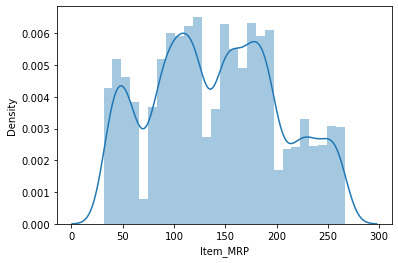

In [44]:
#plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_MRP'])
plt.show()

In [46]:
#Outlet_Establishment_Year column

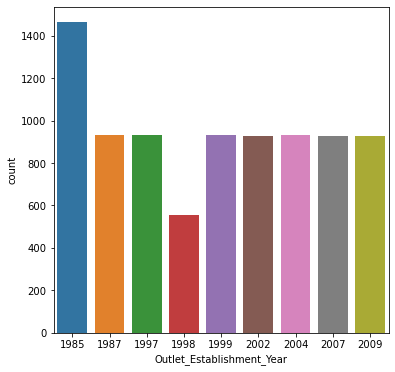

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart)
plt.show()

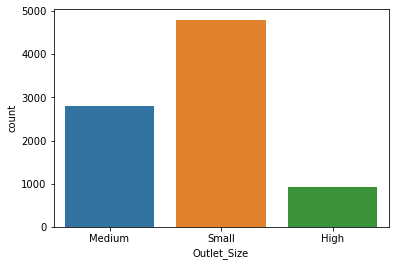

In [50]:
# Outlet_Size column
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Size', data=big_mart)
plt.show()

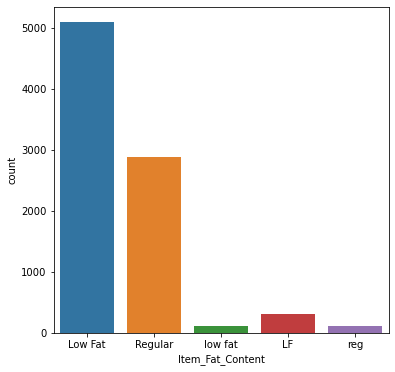

In [48]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart)
plt.show()

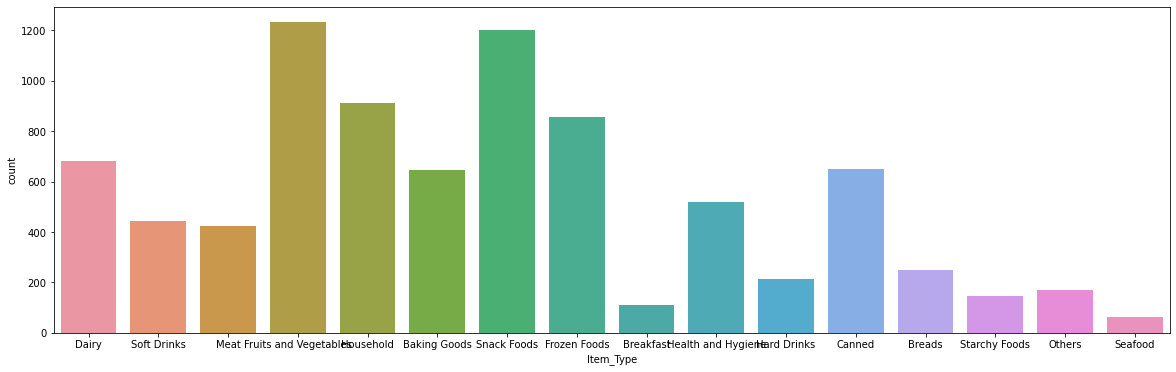

In [49]:
#Item_Type column
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type', data=big_mart)
plt.show()

In [51]:
#data preprocessing

In [53]:
#convert all the categorical values inta numerical values usnig label encoder

In [54]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [55]:
big_mart.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [56]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [58]:
encoder = LabelEncoder()

In [59]:
big_mart['Item_Identifier'] = encoder.fit_transform(big_mart['Item_Identifier'])

big_mart['Item_Fat_Content'] = encoder.fit_transform(big_mart['Item_Fat_Content'])

big_mart['Item_Type'] = encoder.fit_transform(big_mart['Item_Type'])

big_mart['Outlet_Identifier'] = encoder.fit_transform(big_mart['Outlet_Identifier'])

big_mart['Outlet_Size'] = encoder.fit_transform(big_mart['Outlet_Size'])

big_mart['Outlet_Location_Type'] = encoder.fit_transform(big_mart['Outlet_Location_Type'])

big_mart['Outlet_Type'] = encoder.fit_transform(big_mart['Outlet_Type'])

In [60]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [61]:
X = big_mart.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart['Item_Outlet_Sales']

In [62]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [64]:
#splitting the data

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [67]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [76]:
#machine learning model training

In [ ]:
#using linear regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr=LinearRegression()

In [80]:
lr.fit(X_train,Y_train)

LinearRegression()

In [81]:
y_pred=lr.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
mean_squared_error(Y_test,y_pred)

1577094.25267757

In [84]:
lr.score(X_train,Y_train)

0.5071929167339231

In [85]:
from sklearn.metrics import r2_score

In [86]:
r2_score(Y_test,y_pred)

0.48912987193626367

In [87]:
#using XGboost

In [88]:
regressor = XGBRegressor()

In [89]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
k_pred = regressor.predict(X_test)

In [91]:
mean_squared_error(Y_test,k_pred)

1471566.3111618883

In [94]:
regressor.score(X_train,Y_train)

0.8639680373364909

In [96]:
yr_pred=regressor.predict(X_test)

In [99]:
regressor.score(X_train,Y_train)

0.8639680373364909